## Library Imports

In [131]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split


import warnings 
warnings.filterwarnings('ignore')

In [132]:
plt.rcParams['figure.figsize'] = (9, 5)

## Problem Statement

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

The company works with a wide range of restaurants for delivering their items directly to the people.

The company has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

> Data Dictionary

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

1. *market_id* : integer id for the market where the restaurant lies <br>
2. *created_at* : the timestamp at which the order was placed <br>
3. *actual_delivery_time* : the timestamp when the order was delivered <br>
4. *store_primary_category* : category for the restaurant <br>
5. *order_protocol* : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc) <br>
6. *total_items subtotal* : final price of the order <br>
7. *num_distinct_items* : the number of distinct items in the order <br>
8. *min_item_price* : price of the cheapest item in the order <br>
9. *max_item_price* : price of the costliest item in order <br>
10. *total_onshift_partners* : number of delivery partners on duty at the time order was placed <br>
11. *total_busy_partners* : number of delivery partners attending to other tasks <br>
12. *total_outstanding_orders* : total number of orders to be fulfilled at the moment <br>

## Funcrions

In [133]:
def basic_info(df):

    """
    Takes a DataFrame as input, and gives the basic info like shape, missing values count, duplicated rows, unique values and dtypes of the features
    
    Args:
        df (pandas.DataFrame): The DataFrame for which you want the details of

    Returns: 
        None 
    """
    print(f"shape of the date : \n\trows = {df.shape[0]}, columns = {df.shape[1]}\n")
    missing_val_count = df.isna().sum().sum()
    print(f"missing values: \n\tcount = {missing_val_count}")
    if missing_val_count != 0:
        missing_data = df.isna().sum().reset_index().rename({"index" : "feature", 0 : "missing_val_count"}, axis = 1)
        missing_data["missing_val_percentage"] = np.round((missing_data["missing_val_count"] / df.shape[0]) * 100, 2)
        missing_data = missing_data.sort_values(by = "missing_val_count", ascending = False)
        display(missing_data)

    print(f"duplicated records: \n\tcount = {df.duplicated().sum()}\n")
    print(f"Unique Values : ")
    nunique_vals = df.nunique().reset_index().rename({"index" : "feature", 0 : "nunique_vals"}, axis = 1)
    display(nunique_vals)

    display(df.dtypes.reset_index().rename(columns = {"index" : "fetaure", 0 : "data type"}))

## Reading data and basic info

In [134]:
df = pd.read_csv("../datasets/dataset.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [135]:
basic_info(df)

shape of the date : 
	rows = 197428, columns = 14

missing values: 
	count = 55535


,feature,missing_val_count,missing_val_percentage
11,total_onshift_partners,16262,8.24
12,total_busy_partners,16262,8.24
13,total_outstanding_orders,16262,8.24
4,store_primary_category,4760,2.41
5,order_protocol,995,0.50
0,market_id,987,0.50
2,actual_delivery_time,7,0.00
1,created_at,0,0.00
3,store_id,0,0.00
6,total_items,0,0.00


duplicated records: 
	count = 0

Unique Values : 


,feature,nunique_vals
0,market_id,6
1,created_at,180985
2,actual_delivery_time,178110
3,store_id,6743
4,store_primary_category,74
5,order_protocol,7
6,total_items,57
7,subtotal,8368
8,num_distinct_items,20
9,min_item_price,2312


,fetaure,data type
0,market_id,float64
1,created_at,object
2,actual_delivery_time,object
3,store_id,object
4,store_primary_category,object
5,order_protocol,float64
6,total_items,int64
7,subtotal,int64
8,num_distinct_items,int64
9,min_item_price,int64


In [136]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [137]:
df.dropna(subset = ["actual_delivery_time"], inplace = True)
df["created_at"] = pd.to_datetime(df.created_at)
df["actual_delivery_time"] = pd.to_datetime(df.actual_delivery_time)
df["created_at_month"] = df.created_at.dt.month_name()
df["created_at_weekday"] = df.created_at.dt.day_name()
df["created_at_hour"] = df.created_at.dt.hour
df["actual_delivery_month"] = df.actual_delivery_time.dt.month_name()
df["actual_deliveryt_weekday"] = df.actual_delivery_time.dt.day_name()
df["actual_delivery_hour"] = df.actual_delivery_time.dt.hour
df["delivery_time"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()/60

In [138]:
df.market_id = df.market_id.astype("category")
df.order_protocol = df.order_protocol.astype("category")
df.store_primary_category = df.store_primary_category.astype("category")

## EDA

<Axes: xlabel='market_id'>

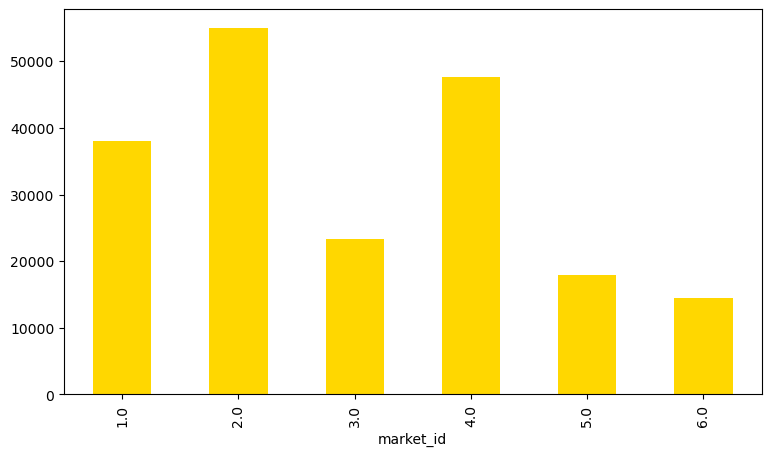

In [139]:
df.market_id.value_counts(sort = False).plot(kind = "bar", color = "gold")

<Axes: xlabel='order_protocol'>

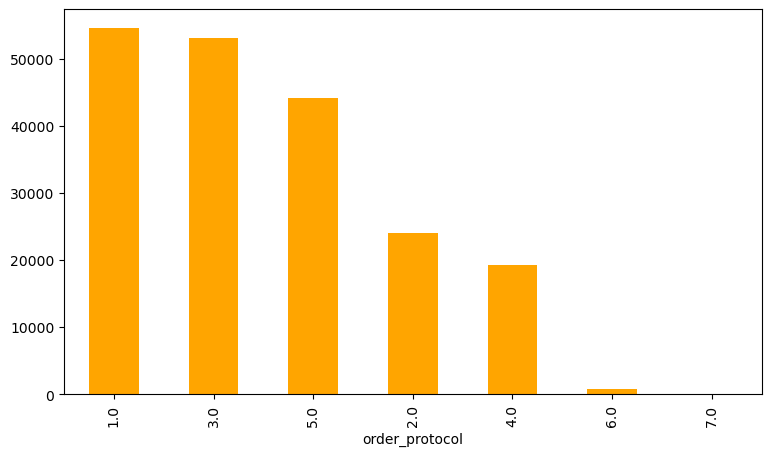

In [140]:
df["order_protocol"].value_counts().plot(kind = "bar", color = "orange")

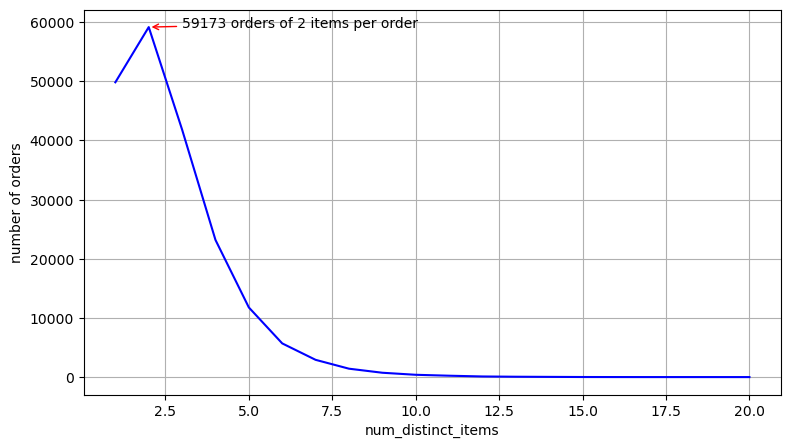

In [141]:
ax = df["num_distinct_items"].value_counts().sort_index().plot(kind = "line", grid = True, ylabel = "number of orders", color = "blue")
# Finding the maximum value and its corresponding x-coordinate
max_value = df["num_distinct_items"].value_counts().max()
max_index = df["num_distinct_items"].value_counts().idxmax()

# Annotating the maximum point
ax.annotate(f'{max_value} orders of {max_index} items per order', xy=(max_index, max_value), xytext=(max_index+1, max_value - 100), arrowprops=dict(arrowstyle='->', color = "red"))

plt.show()

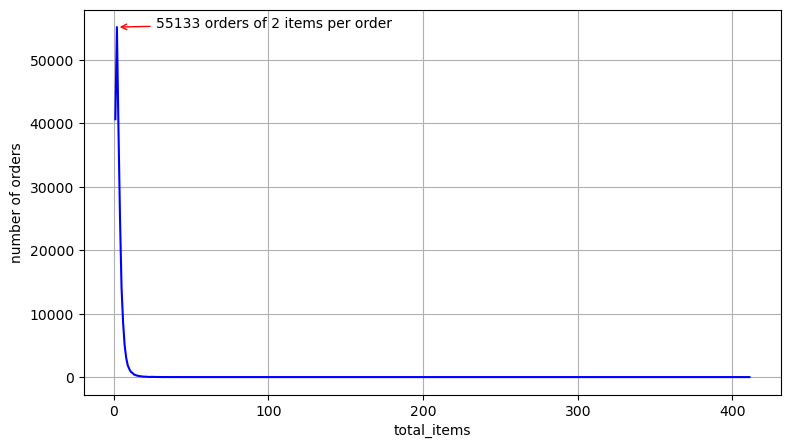

In [142]:
ax = df["total_items"].value_counts().sort_index().plot(kind = "line", grid = True, ylabel = "number of orders", color = "blue")
# Finding the maximum value and its corresponding x-coordinate
max_value = df["total_items"].value_counts().max()
max_index = df["total_items"].value_counts().idxmax()

# Annotating the maximum point
ax.annotate(f'{max_value} orders of {max_index} items per order', xy=(max_index, max_value), xytext=(max_index+25, max_value - 100), arrowprops=dict(arrowstyle='->', color = "red"))

plt.show()

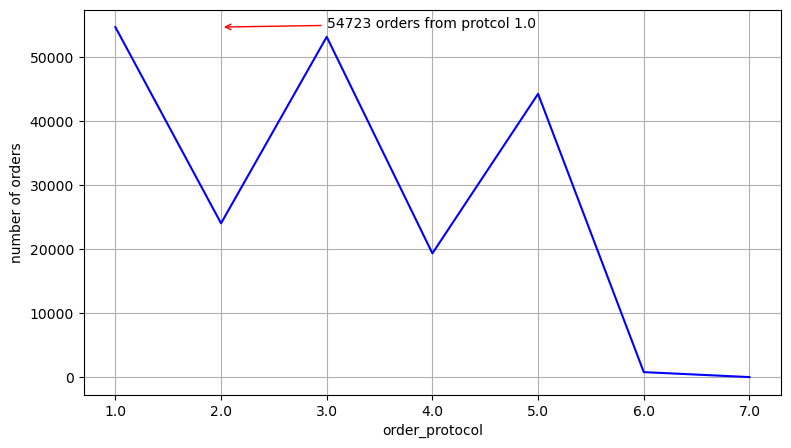

In [143]:
ax = df["order_protocol"].value_counts().sort_index().plot(kind = "line", grid = True, ylabel = "number of orders", color = "blue")
# Finding the maximum value and its corresponding x-coordinate
max_value = df["order_protocol"].value_counts().max()
max_index = df["order_protocol"].value_counts().idxmax()

# Annotating the maximum point
ax.annotate(f'{max_value} orders from protcol {max_index}', xy=(max_index, max_value), xytext=(max_index+1, max_value - 100), arrowprops=dict(arrowstyle='->', color = "red"))

plt.show()

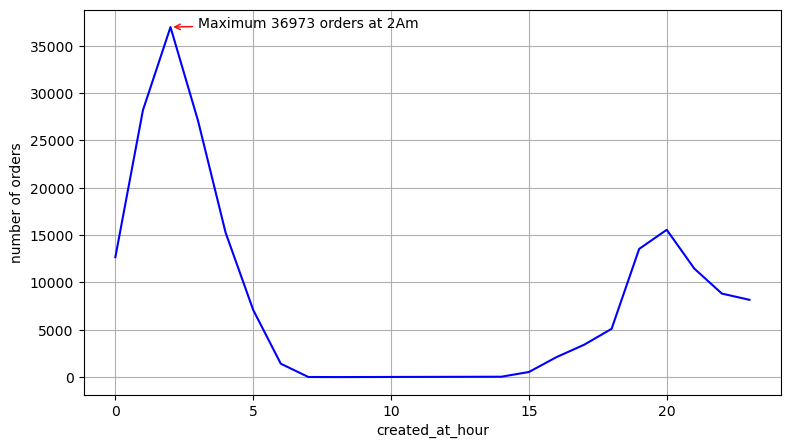

In [144]:
ax = df["created_at_hour"].value_counts().sort_index().plot(kind = "line", grid = True, ylabel = "number of orders", color = "blue")
# Finding the maximum value and its corresponding x-coordinate
max_value = df["created_at_hour"].value_counts().max()
max_index = df["created_at_hour"].value_counts().idxmax()

# Annotating the maximum point
ax.annotate(f'Maximum {max_value} orders at {max_index}Am', xy=(max_index, max_value), xytext=(max_index+1, max_value - 100), arrowprops=dict(arrowstyle='->', color = "red"))

plt.show()

In [145]:
df["created_at_month"].value_counts().reset_index()

,created_at_month,count
0,February,128938
1,January,68482
2,October,1


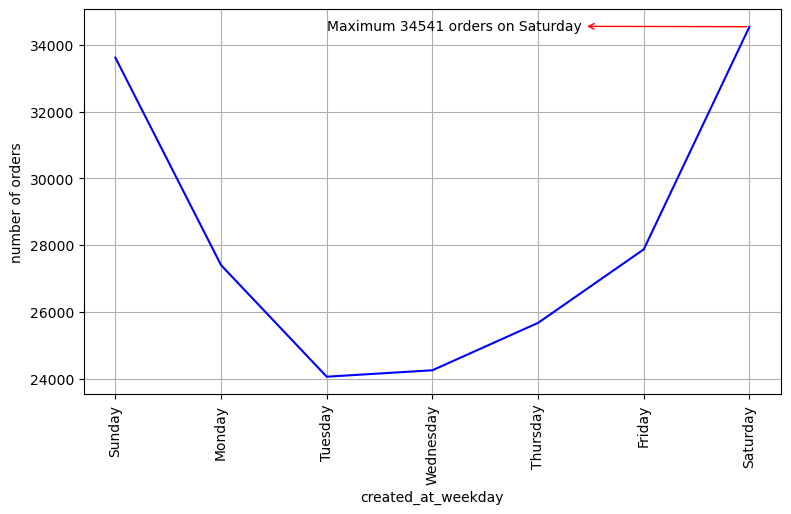

In [146]:
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
ax = df["created_at_weekday"].value_counts().reindex(day_order).plot(kind="line", grid=True, ylabel="number of orders", color="blue")
plt.xticks(rotation=90)

max_value = df["created_at_weekday"].value_counts().max()
max_index = df["created_at_weekday"].value_counts().idxmax()

ax.annotate(f'Maximum {max_value} orders on {max_index}', xy=(day_order.index(max_index), max_value), xytext=(day_order.index(max_index) - 4, max_value - 100), arrowprops=dict(arrowstyle='<-', color="red"))
plt.show()


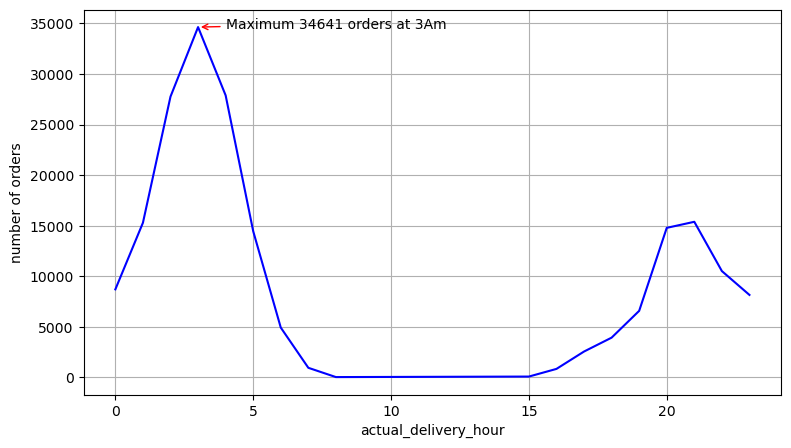

In [147]:
ax = df["actual_delivery_hour"].value_counts().sort_index().plot(kind = "line", grid = True, ylabel = "number of orders", color = "blue")
# Finding the maximum value and its corresponding x-coordinate
max_value = df["actual_delivery_hour"].value_counts().max()
max_index = df["actual_delivery_hour"].value_counts().idxmax()

# Annotating the maximum point
ax.annotate(f'Maximum {max_value} orders at {max_index}Am', xy=(max_index, max_value), xytext=(max_index+1, max_value - 100), arrowprops=dict(arrowstyle='->', color = "red"))

plt.show()

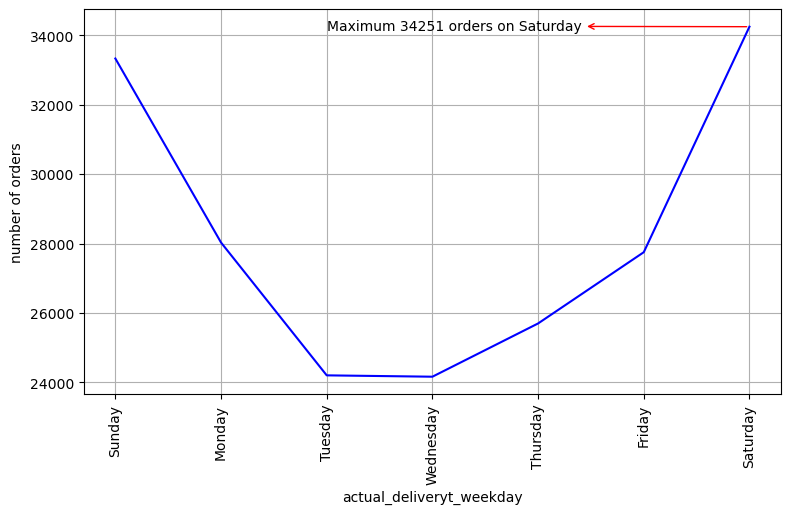

In [148]:
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
ax = df["actual_deliveryt_weekday"].value_counts().reindex(day_order).plot(kind="line", grid=True, ylabel="number of orders", color="blue")
plt.xticks(rotation=90)

max_value = df["actual_deliveryt_weekday"].value_counts().max()
max_index = df["actual_deliveryt_weekday"].value_counts().idxmax()

ax.annotate(f'Maximum {max_value} orders on {max_index}', xy=(day_order.index(max_index), max_value), xytext=(day_order.index(max_index) - 4, max_value - 100), arrowprops=dict(arrowstyle='<-', color="red"))
plt.show()


In [149]:
df.actual_delivery_month.value_counts()

actual_delivery_month
February    129191
January      68230
Name: count, dtype: int64

In [150]:
df[df.created_at_month == "October"]
# this seems like an outlier

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_at_month,created_at_weekday,created_at_hour,actual_delivery_month,actual_deliveryt_weekday,actual_delivery_hour,delivery_time
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,675f9820626f5bc0afb47b57890b466e,italian,1.0,1,1695,1,1595,...,NaN,NaN,NaN,October,Sunday,5,January,Sunday,19,141947.65


In [151]:
print(f"the minimum delivery time = {df.delivery_time.min()}")
print(f"the maximum delivery time = {df.delivery_time.max()} minutes -> {df.delivery_time.max()/60} hours -> {df.delivery_time.max()/(24 * 60)} days")

the minimum delivery time = 1.6833333333333333
the maximum delivery time = 141947.65 minutes -> 2365.7941666666666 hours -> 98.57475694444445 days


<Axes: xlabel='store_primary_category'>

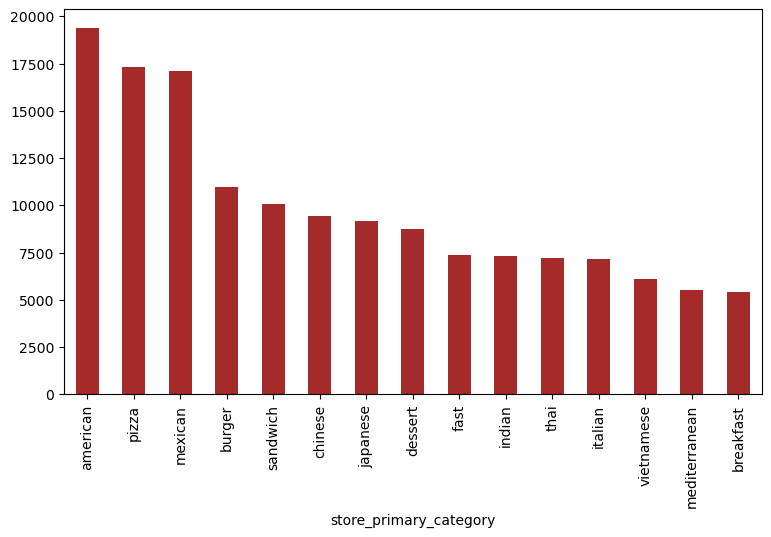

In [152]:
df.store_primary_category.value_counts().head(15).plot(kind = "bar", color = "brown")

In [153]:
df[["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]]

,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,33.0,14.0,21.0
1,1.0,2.0,2.0
2,1.0,0.0,0.0
3,1.0,1.0,2.0
4,6.0,6.0,9.0
...,...,...,...
197423,17.0,17.0,23.0
197424,12.0,11.0,14.0
197425,39.0,41.0,40.0
197426,7.0,7.0,12.0


<Axes: xlabel='created_at_hour'>

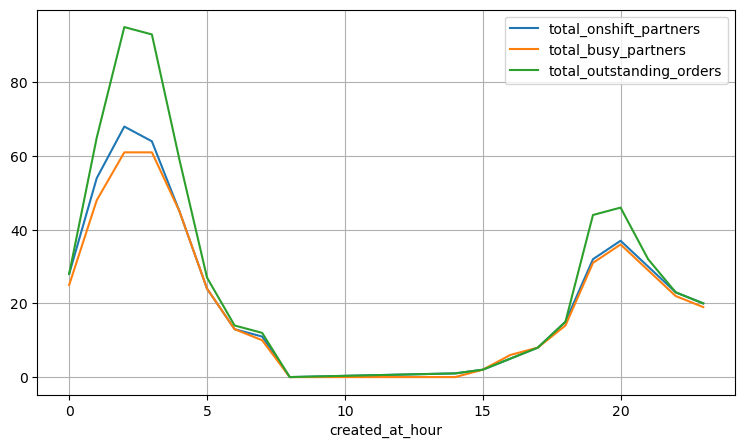

In [154]:
df.groupby(by = ["created_at_hour"])[["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].mean().round().plot(kind = "line", grid = True)

<Axes: ylabel='Density'>

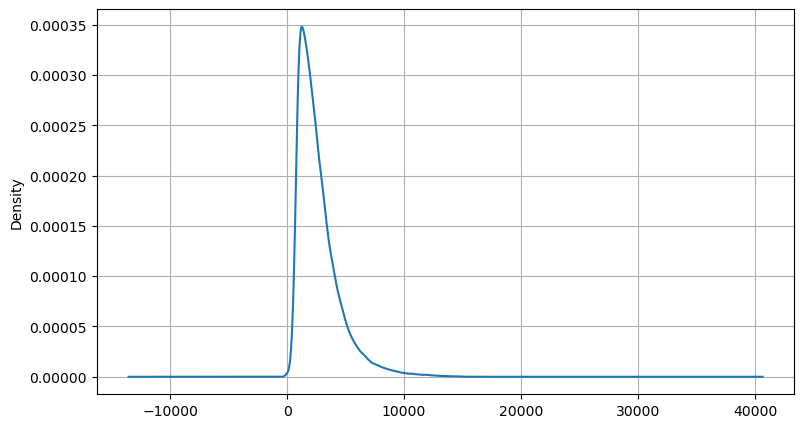

In [155]:
df.subtotal.plot(kind = "kde", grid = True)

In [156]:
print(f"the minimum total for order = {df.subtotal.min()}")
print(f"the maximum total for order = {df.subtotal.max()}")

the minimum total for order = 0
the maximum total for order = 27100


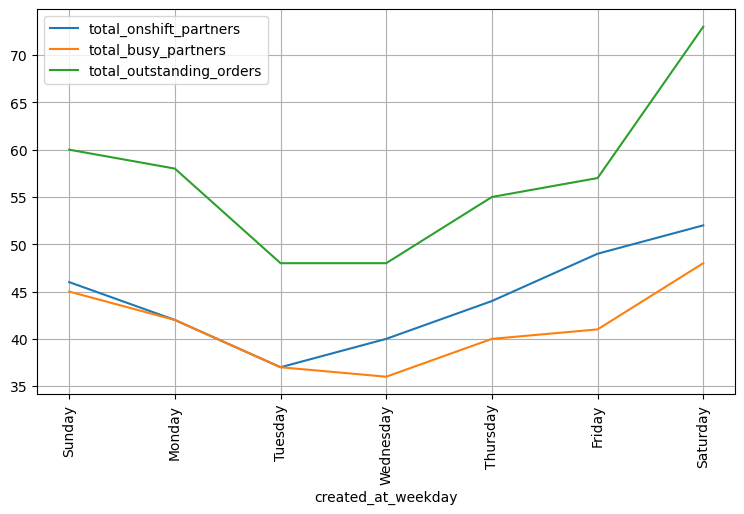

In [157]:
df.groupby(by = ["created_at_weekday"])[["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].mean().round().loc[day_order, :].plot(kind = "line", grid = True)
plt.xticks(rotation=90)
plt.show()

(0.0, 250.0)

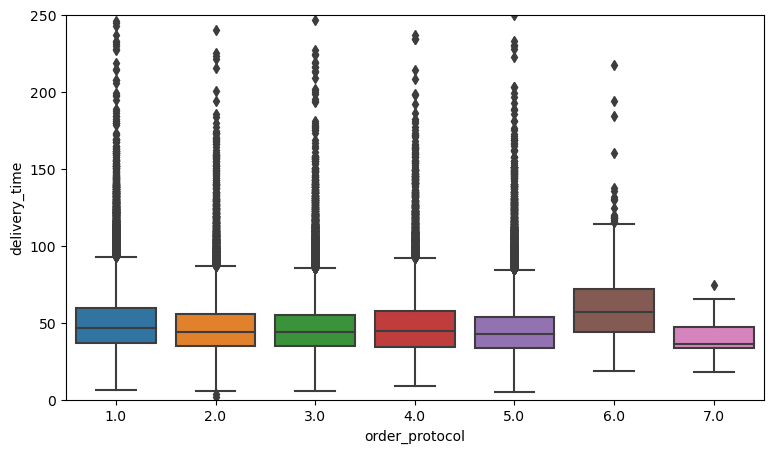

In [158]:
sns.boxplot(x = df.order_protocol, y = df.delivery_time)
plt.ylim(0,250)

# There is no difference with respect to the deilvery time and order_protocol

<Axes: xlabel='market_id', ylabel='count'>

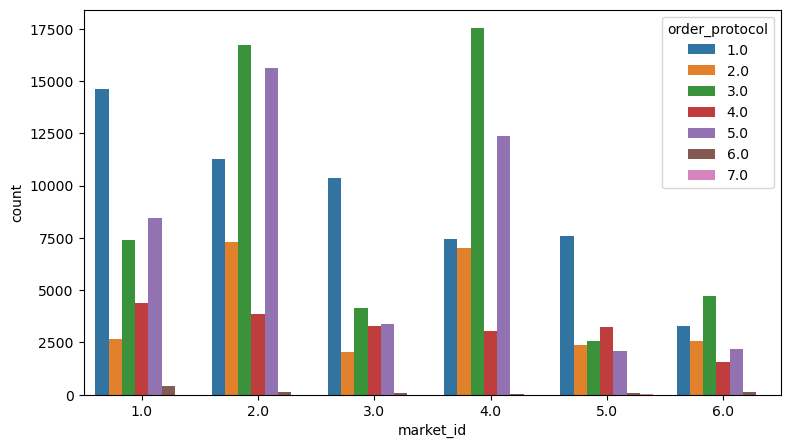

In [159]:
sns.countplot(x = df.market_id, hue = df.order_protocol)

<Axes: xlabel='order_protocol', ylabel='subtotal'>

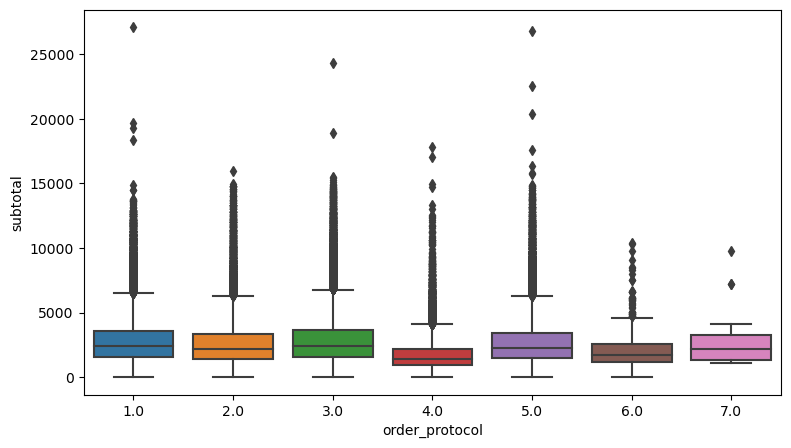

In [160]:
sns.boxplot(x = df.order_protocol, y = df.subtotal)

<Axes: xlabel='order_protocol', ylabel='created_at_hour'>

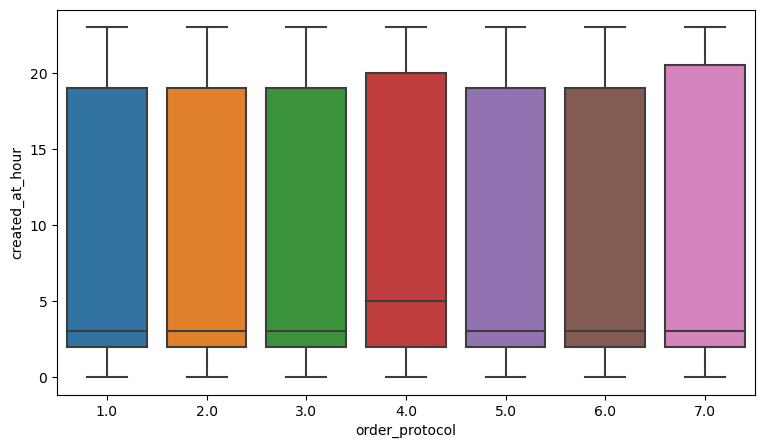

In [161]:
sns.boxplot(x = df.order_protocol, y = df.created_at_hour)

<Axes: xlabel='created_at_weekday', ylabel='count'>

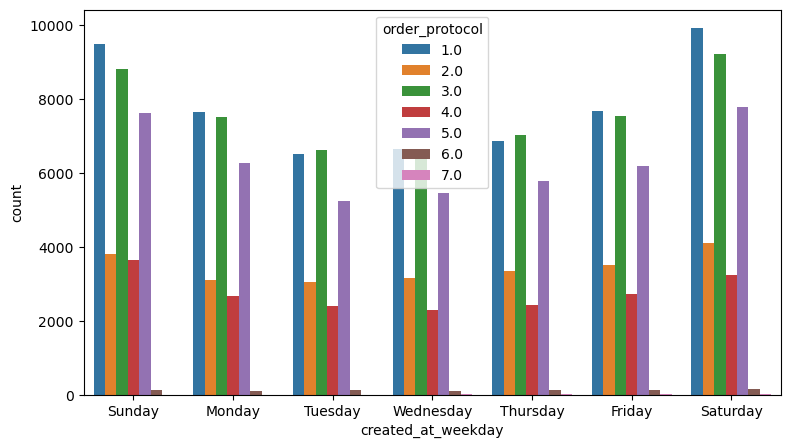

In [162]:
sns.countplot(hue = df.order_protocol, x = df.created_at_weekday, order = day_order)

In [163]:
df['store_primary_category'].astype('category').cat.codes.dtype

dtype('int8')

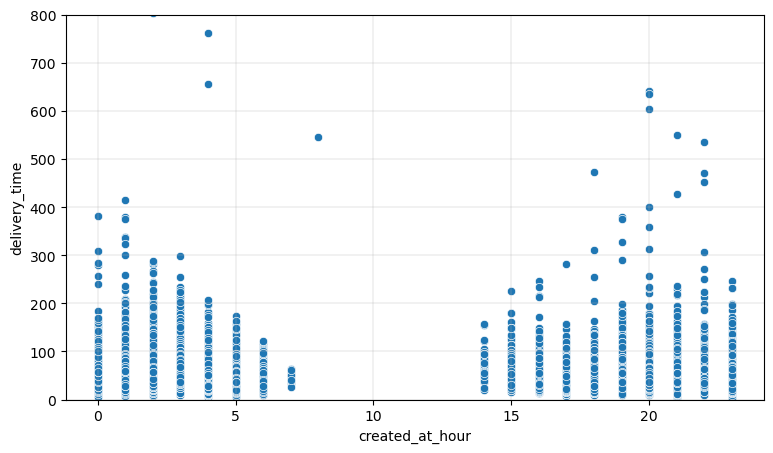

In [164]:
sns.scatterplot(x = df.created_at_hour, y = df.delivery_time)
plt.ylim(0,800)
plt.grid(True, linewidth = 0.25)

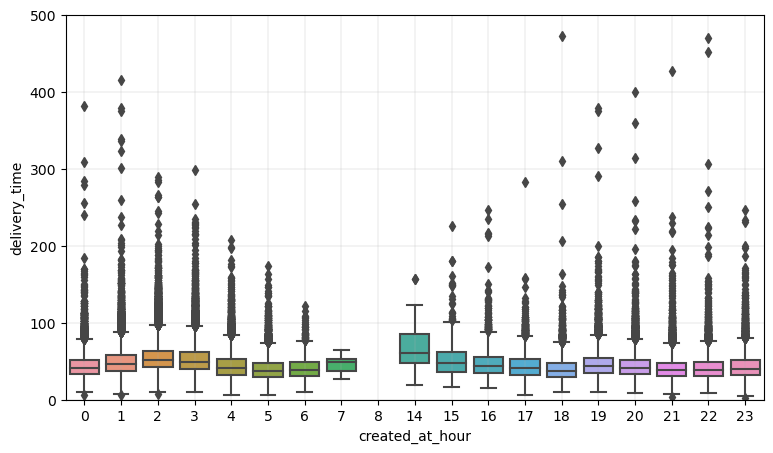

In [165]:
sns.boxplot(x = df.created_at_hour, y = df.delivery_time )
plt.ylim(0,500)
plt.grid(True, linewidth = 0.2)
plt.show()

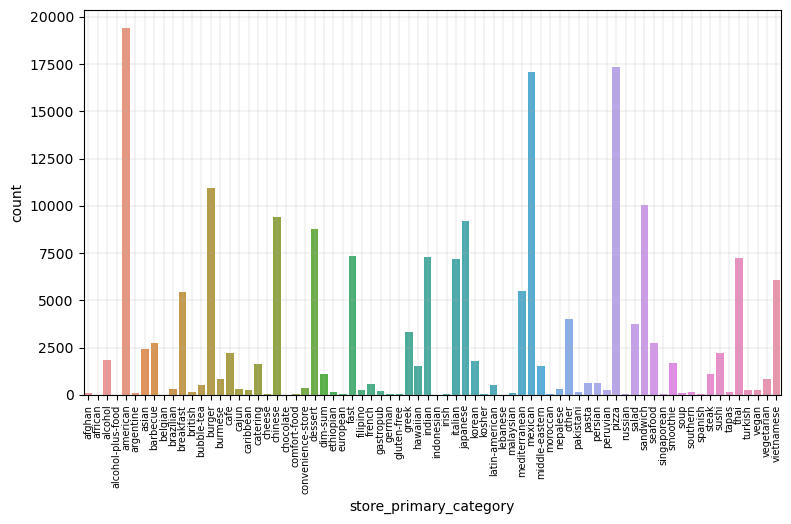

In [166]:
sns.countplot(x = df.store_primary_category)
plt.xticks(rotation = 90, fontsize = 7)
plt.Figure(figsize = (10,7))
plt.grid(True, linewidth = 0.2)
plt.show()

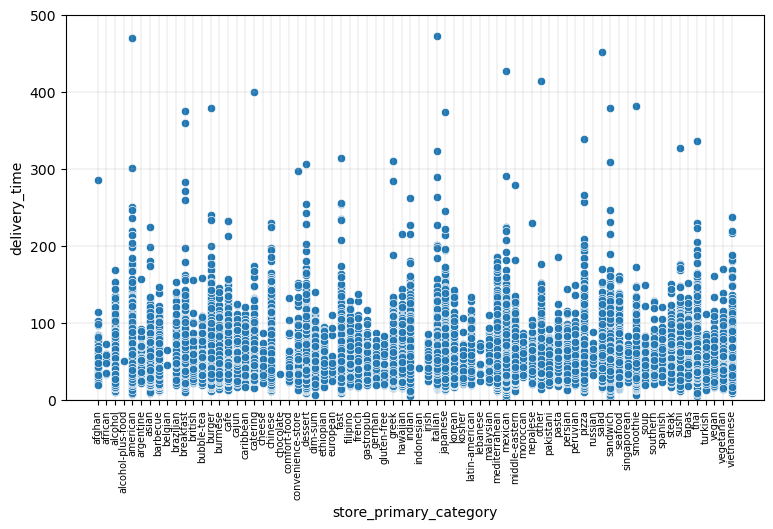

In [167]:
sns.scatterplot(x = df.store_primary_category, y = df.delivery_time)
plt.ylim(0,500)
plt.xticks(rotation = 90, fontsize = 7)
plt.Figure(figsize = (10,7))
plt.grid(True, linewidth = 0.2)
plt.show()
